In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import mdtraj
import pytraj as pt
from simtk import openmm, unit


In [16]:

#BGangles = np.loadtxt("HNCanglesBG.dat", usecols=1)
#MDangles = np.loadtxt("HNCanglesMD.dat", usecols=1)

def plot_dof_comparison(BGdof, BG2dof, MDdof, MD2dof, dofname):  
    fig, ax = plt.subplots()    

    if 'bond' in dofname:
        ax.set_xlabel(f"{dofname} ($\AA$)")
    if 'angle' in dofname:
        ax.set_xlabel(f"{dofname} ($^r$)")
    if 'dihed'in dofname:
        ax.set_xlabel(f"{dofname} ($^\circ$)")
    # y-axis on the right
    
    ax.hist(BGdof, bins=40, label="BG_TSF", alpha=1)
    ax.hist(BG2dof, bins=40, label="BG_mytraj", alpha=0.6)
    ax.hist(MDdof, bins=40, label="MD_TSF", alpha=0.4)
    ax.hist(MD2dof, bins=40, label="MD_mytraj", alpha=0.3)
    ax.set_ylabel(f"Count   [#{dofname} / {len(MDdof)}]")
    ax.legend()
    plt.savefig(f"Histograms/TSFvsmytraj/{dofname}.png")
    plt.close

In [31]:
#plot_dof_comparison(BGangles,MDangles,"HNC angle")

In [4]:
trajectory_bg = pt.load('TSF_stride35_samplestraj.dcd', top='ala2_fromURL.pdb')
trajectory_bg2 = pt.load('obcstride10Samplestraj.dcd', top='ala2_fromURL.pdb')
trajectory_md = pt.load('TSFtraj.dcd',top='ala2_fromURL.pdb',stride=35)
trajectory_md2 = pt.load('obcimplicit.dcd', top='ala2_fromURL.pdb', stride=10)

In [13]:
def calc_bonds(trajectory,type):
    bonds = {}
    for bond in trajectory.topology.bonds:
        bonds[str(bond.indices)] = pt.calc_distance(trajectory, bond.indices)[0]
    df = pd.DataFrame(bonds)
    #df.to_csv(f'{type}bonds.csv')
    return df
    

headers = []
atompairs = np.empty((trajectory_md2.topology.n_bonds,2))
i = 0
for bond in trajectory_md2.topology.bonds:
    headers.append(str(bond))
    atompairs[i,:] = [bond.atom1.index,bond.atom2.index]
    i += 1
#print(atompairs[0:2,:])
MD2bonds = mdtraj.compute_distances(trajectory_md2,atompairs)
#print(MDbonds)

MD2bondsdf = pd.DataFrame(MD2bonds, columns=[headers])

for col in MD2bondsdf.columns:
    fig, ax = plt.subplots()   
    
    ax.set_xlabel(f"length ($\AA$)")
    ax.hist((MD2bondsdf[col]*10), bins=40, label="MD",)
    ax.set_ylabel(f"Count   [#bonds / {len(MD2bondsdf[col])}]")
    ax.legend()
    #plt.savefig(f"Histograms/{dofname}.png" )
    plt.close

plt.close('all')

In [14]:
BGbonds = calc_bonds(trajectory_bg, type='BG')
BG2bonds = calc_bonds(trajectory_bg2, type='BG2')
MDbonds = calc_bonds(trajectory_md, type='MD')
MD2bonds = calc_bonds(trajectory_md2, type = 'MD2')
print(BGbonds.columns)
print(MDbonds.columns)
print(MD2bonds.columns)

Index(['[1 4]', '[4 5]', '[6 8]', '[ 8 10]', '[ 8 14]', '[14 15]', '[16 18]',
       '[4 6]', '[14 16]', '[1 0]', '[1 2]', '[1 3]', '[6 7]', '[8 9]',
       '[10 11]', '[10 12]', '[10 13]', '[16 17]', '[18 19]', '[18 20]',
       '[18 21]'],
      dtype='object')
Index(['[1 4]', '[4 5]', '[6 8]', '[ 8 10]', '[ 8 14]', '[14 15]', '[16 18]',
       '[4 6]', '[14 16]', '[1 0]', '[1 2]', '[1 3]', '[6 7]', '[8 9]',
       '[10 11]', '[10 12]', '[10 13]', '[16 17]', '[18 19]', '[18 20]',
       '[18 21]'],
      dtype='object')
Index(['[1 4]', '[4 5]', '[6 8]', '[ 8 10]', '[ 8 14]', '[14 15]', '[16 18]',
       '[4 6]', '[14 16]', '[1 0]', '[1 2]', '[1 3]', '[6 7]', '[8 9]',
       '[10 11]', '[10 12]', '[10 13]', '[16 17]', '[18 19]', '[18 20]',
       '[18 21]'],
      dtype='object')


/home/abbie/miniconda3/envs/bgflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


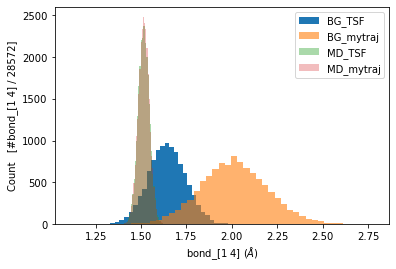

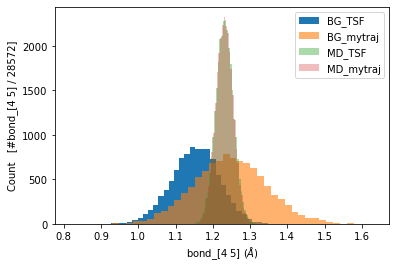

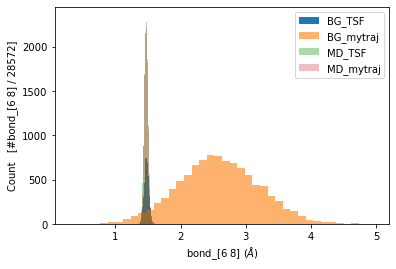

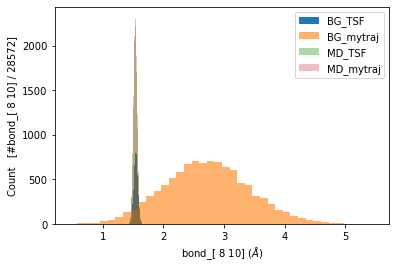

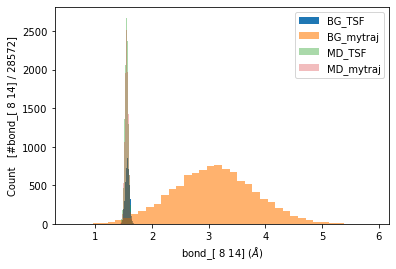

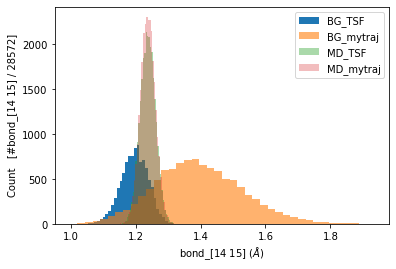

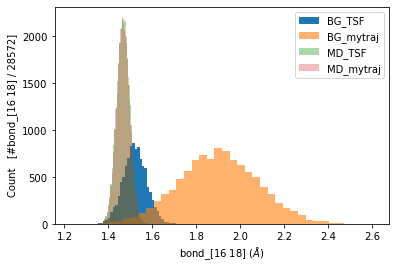

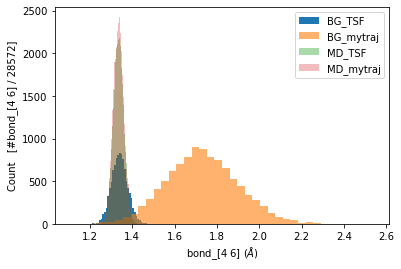

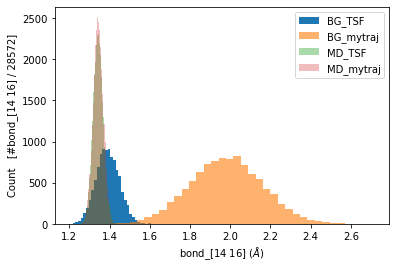

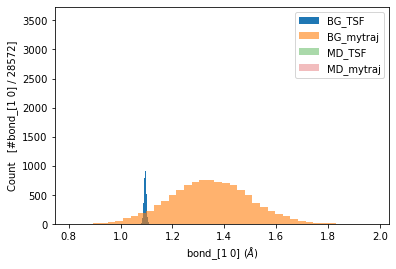

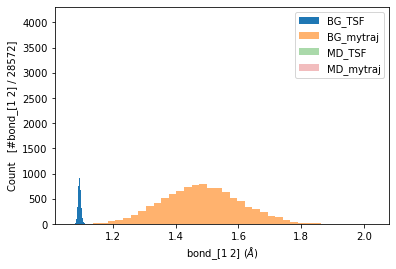

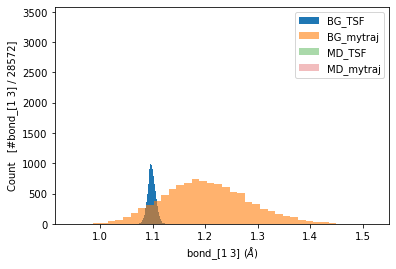

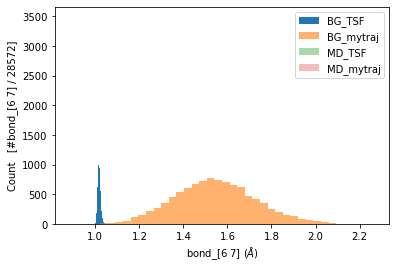

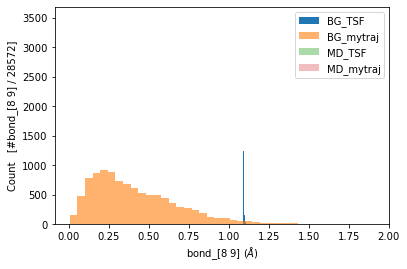

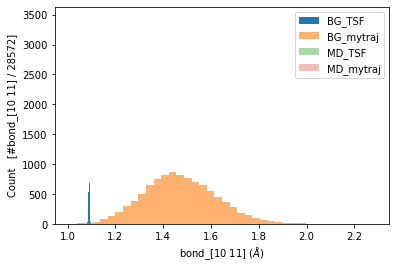

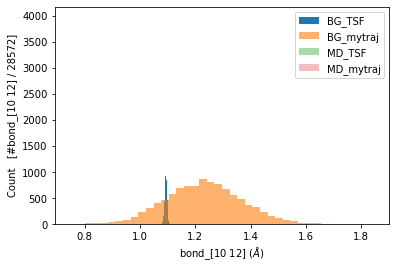

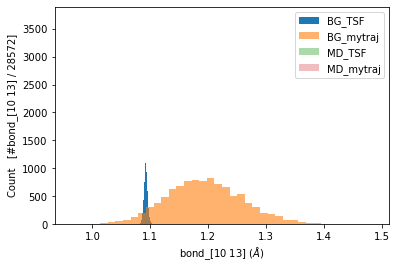

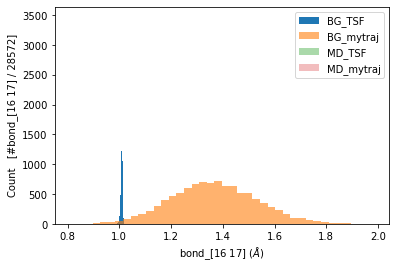

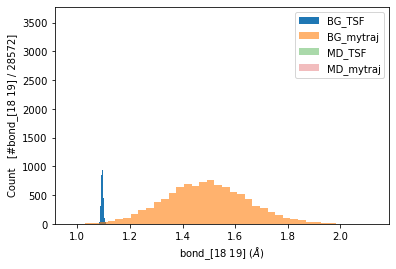

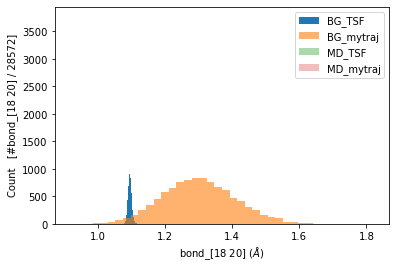

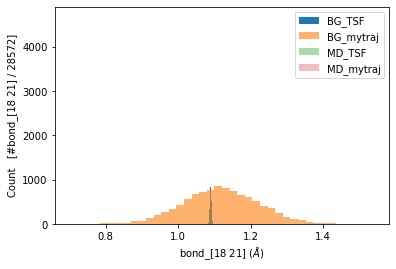

In [15]:
#print(BGbonds.columns)
for col in BGbonds.columns:
    plot_dof_comparison(BGbonds[col],BG2bonds[col],MDbonds[col],MD2bonds[col] ,dofname=f'bond_{col}')

In [22]:
#test = pt.load('samplestraj2000mixed.pdb', top='ala.prm7')

In [8]:
def calc_diheds(trajectory,type):
    diheds = {}
    for dihedral in trajectory.topology.dihedrals:
        diheds[str(dihedral.indices)] = pt.calc_dihedral(trajectory, dihedral.indices)[0]

    df = pd.DataFrame(diheds)
    #df.to_csv(f'{type}diheds.csv')
    return df


In [9]:
BGdiheds = calc_diheds(trajectory_bg,'BG')
MDdiheds = calc_diheds(trajectory_md,'MD')
MD2diheds = calc_diheds(trajectory_md2,'MD2')

/home/abbie/miniconda3/envs/bgflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


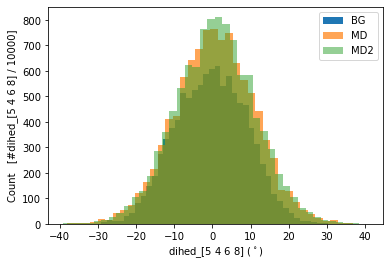

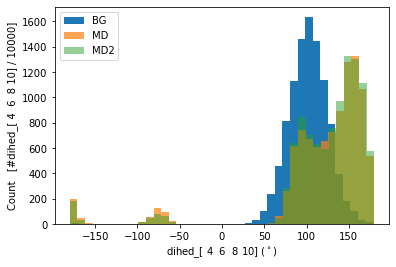

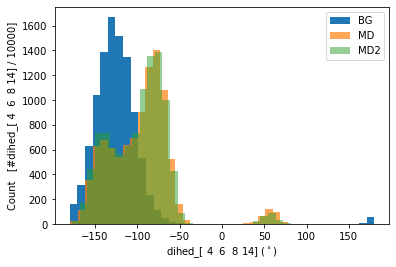

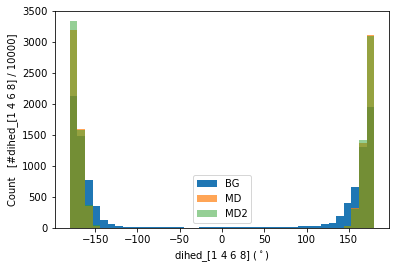

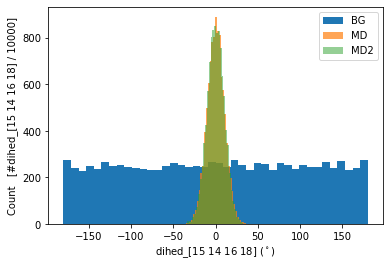

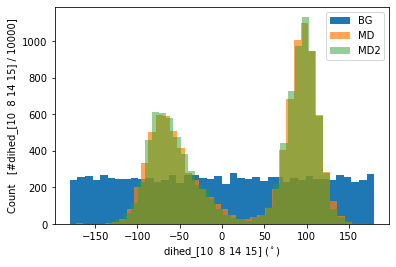

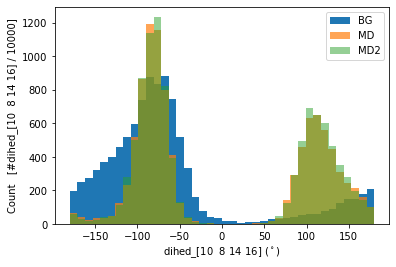

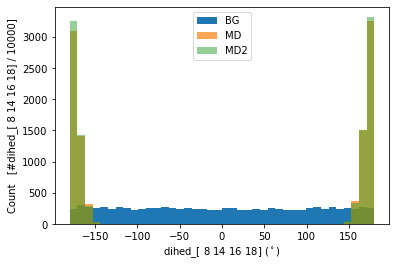

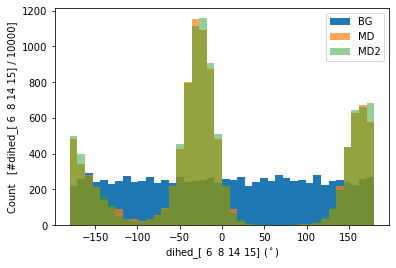

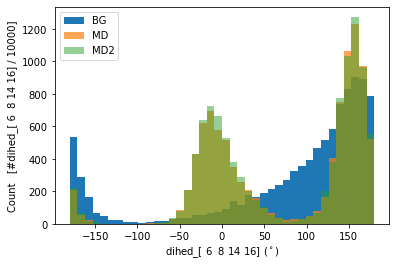

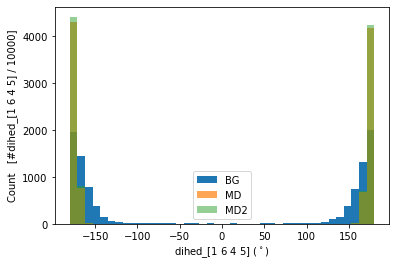

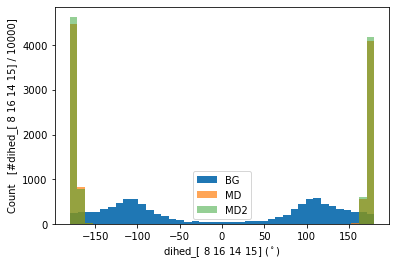

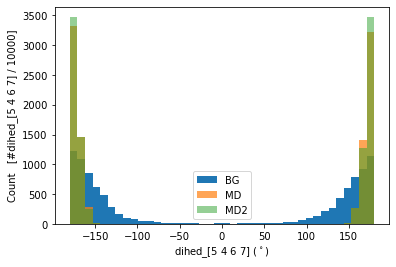

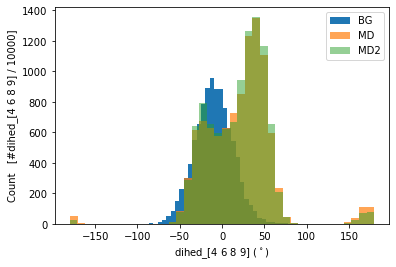

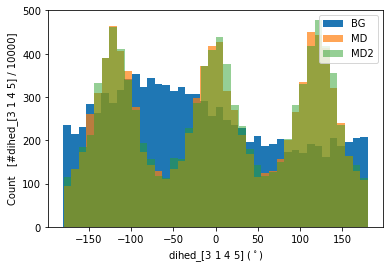

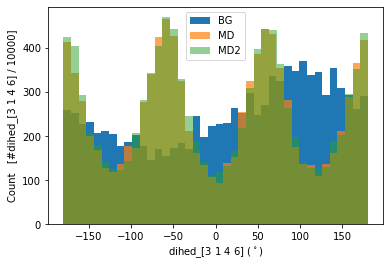

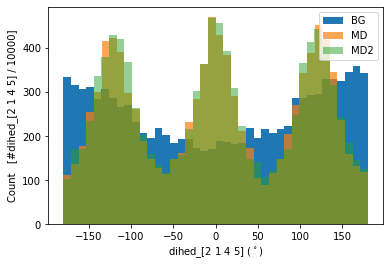

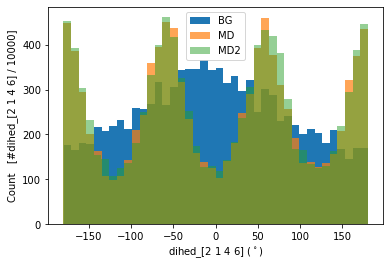

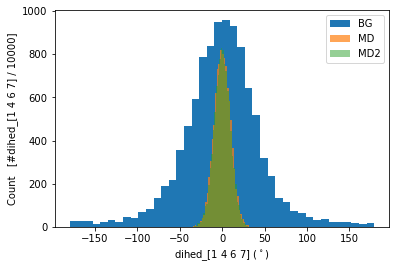

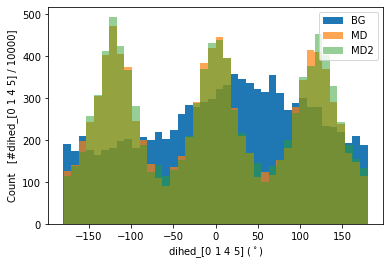

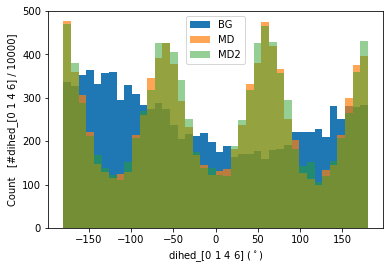

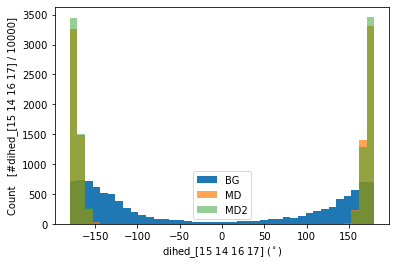

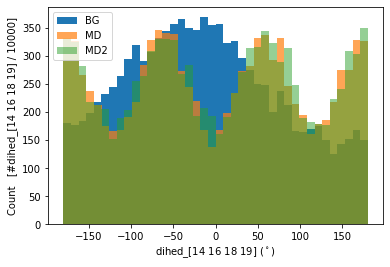

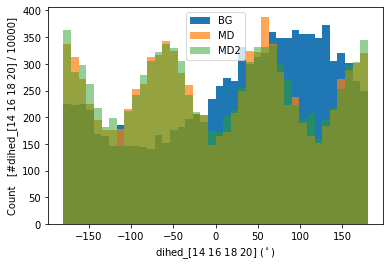

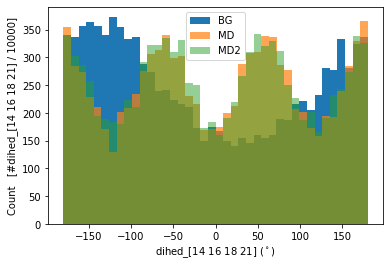

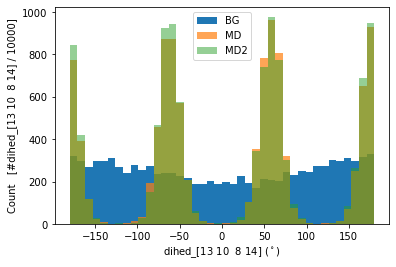

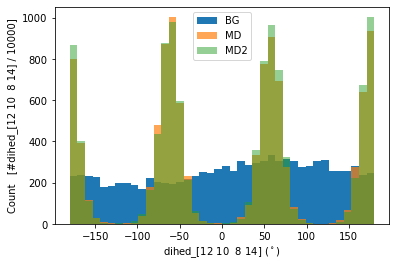

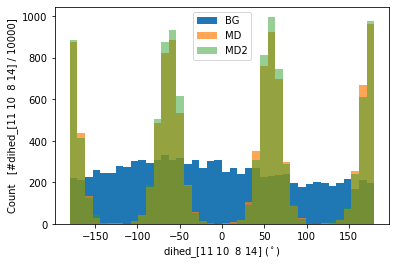

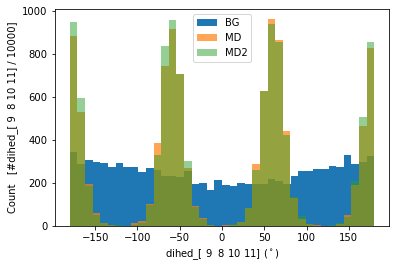

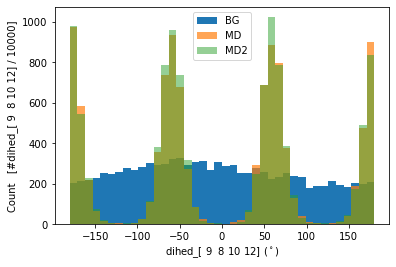

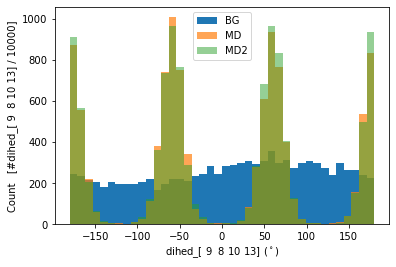

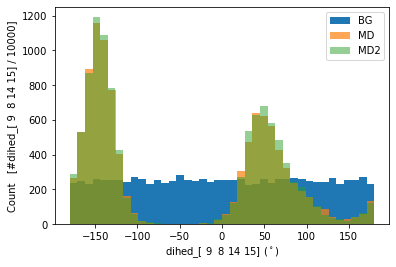

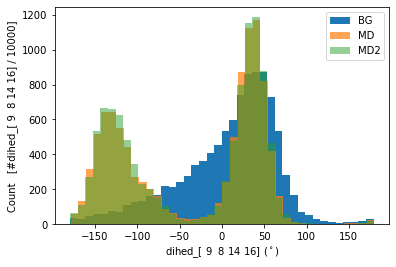

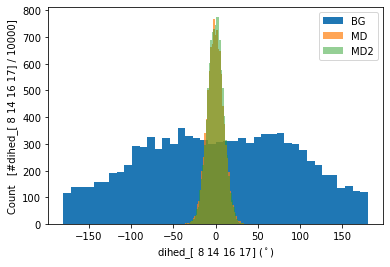

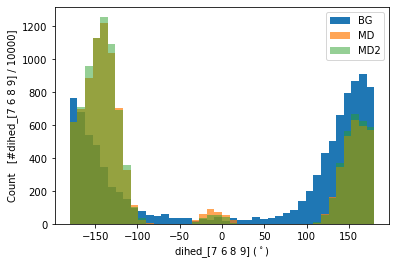

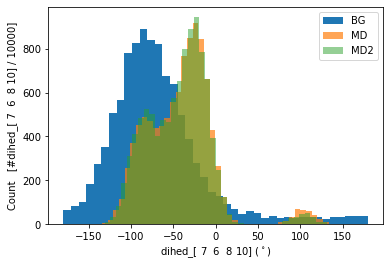

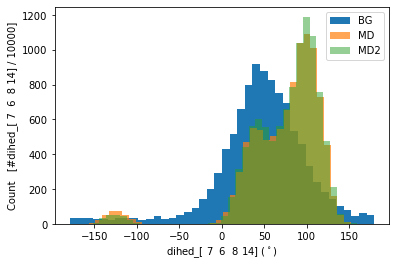

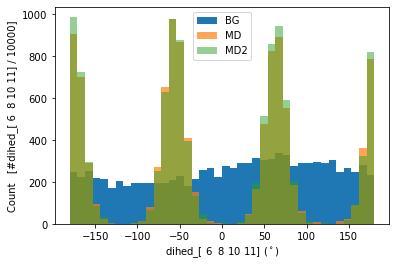

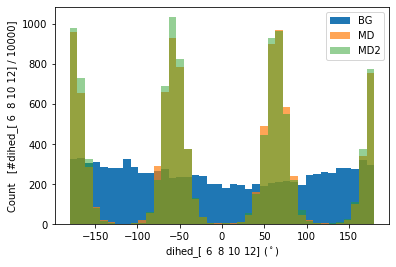

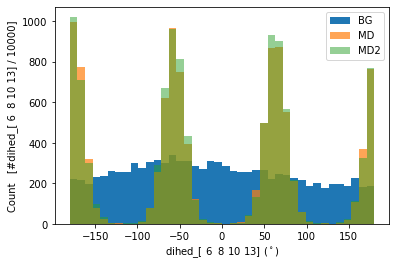

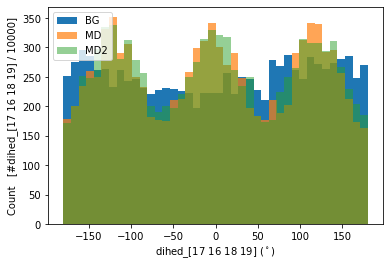

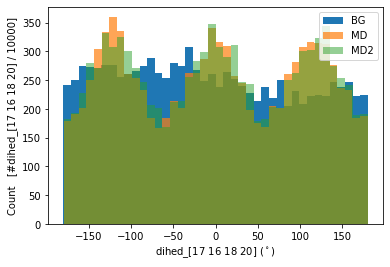

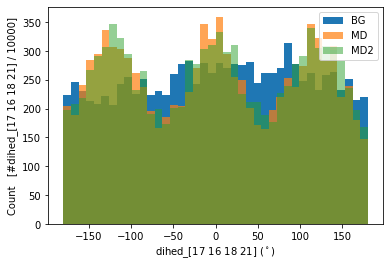

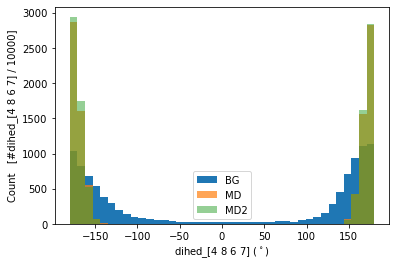

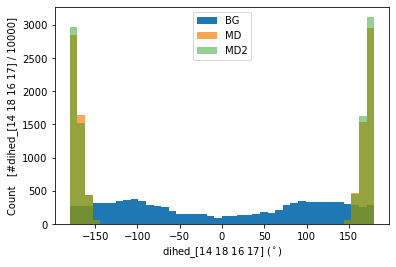

In [62]:
#print(BGdiheds.columns)
for col in BGdiheds:
    plot_dof_comparison(BGdiheds[col],MDdiheds[col],MD2diheds[col], dofname=f'dihed_{col}')
#plot_dof_comparison(BGdiheds['[5 4 6 8]'],MDdiheds['[5 4 6 8]'], dofname='dihed_[5 4 6 8]')

In [8]:
angles = pd.read_csv('ala_angles.txt',delim_whitespace=True,usecols=[3,4,5,6,7,8])
for index_column in ['A1','A2','A3']:
    angles[f'corrected_index_{index_column}'] = angles[index_column] - 1 
angles['full_corrected'] = angles.iloc[:,6:9].apply(
    lambda x: np.array(x),
    axis=1
    )

def calc_angles(trajectory,type):
    angles = {}
    for indices in angles['full_corrected']:
        print(indices)
        #indices_array = np.array(anglemasks.iloc[i,7:10])
        #i+=1
        #print(indices_array)
        angles[indices] = mdtraj.compute_angles(trajectory, [indices])
    
    df = pd.DataFrame(angles,)
    #df.to_csv(f'{type}angles.csv')
    return df


In [9]:
def calc_angles(trajectory):
     return mdtraj.compute_angles(trajectory, angles['full_corrected'],periodic=False)

In [10]:
anglesBG = calc_angles(trajectory_bg)
anglesBG2 = calc_angles(trajectory_bg2)
anglesMD = calc_angles(trajectory_md)
anglesMD2 = calc_angles(trajectory_md2)

[4 6 7]
[3 1 4]
[2 1 3]
[2 1 4]
[0 1 2]
[0 1 3]
[0 1 4]
[14 16 17]
[12 10 13]
[11 10 12]
[11 10 13]
[ 9  8 10]
[ 9  8 14]
[ 8 10 11]
[ 8 10 12]
[ 8 10 13]
[7 6 8]
[6 8 9]
[20 18 21]
[19 18 20]
[19 18 21]


/home/abbie/miniconda3/envs/bgflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


[17 16 18]
[16 18 19]
[16 18 20]
[16 18 21]
[5 4 6]
[4 6 8]
[1 4 5]
[1 4 6]
[15 14 16]
[14 16 18]
[10  8 14]
[ 8 14 15]
[ 8 14 16]
[ 6  8 10]
[ 6  8 14]


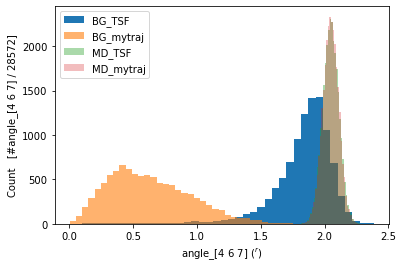

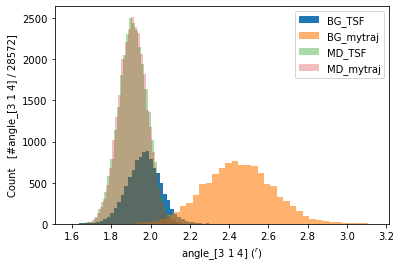

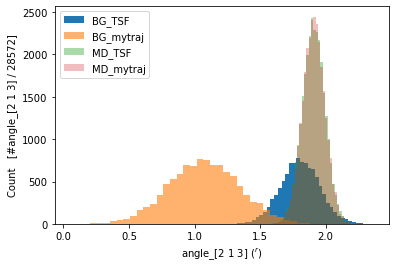

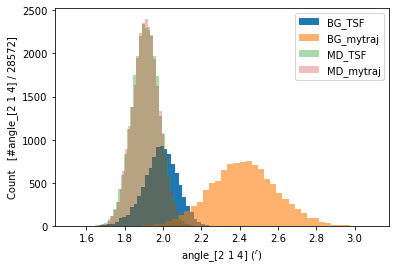

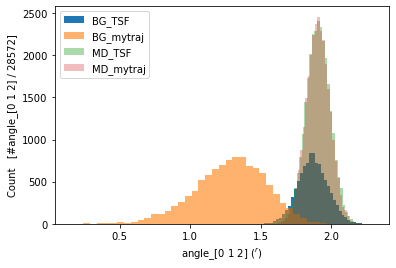

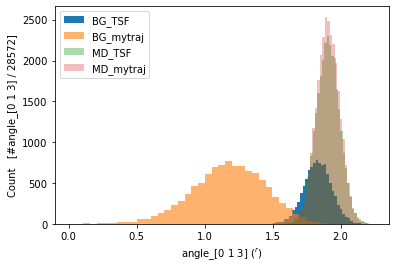

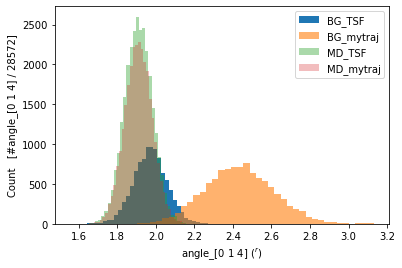

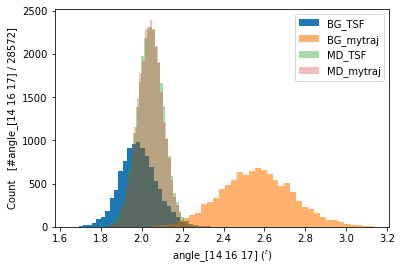

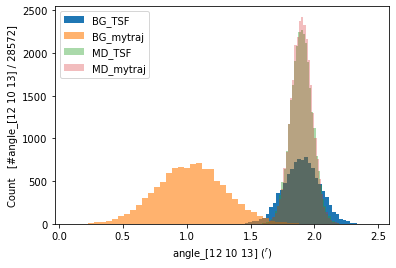

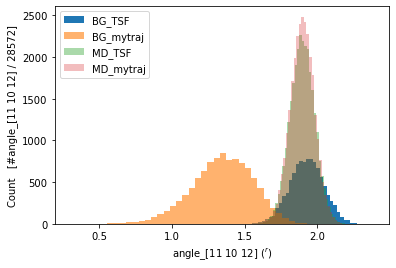

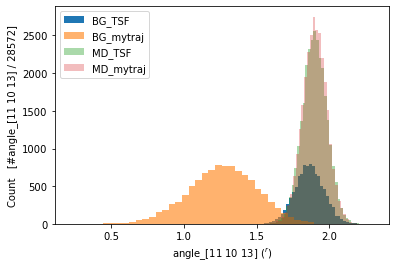

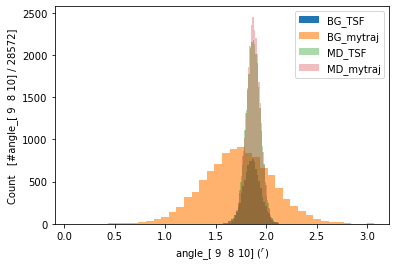

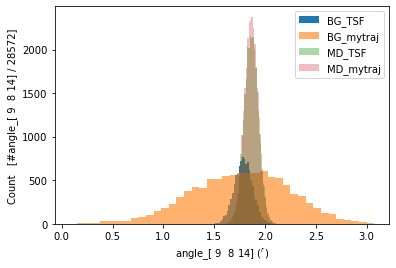

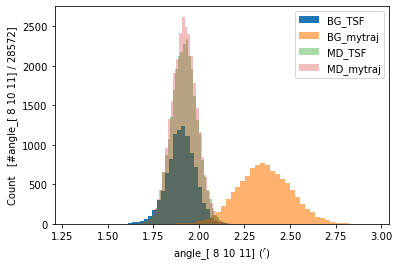

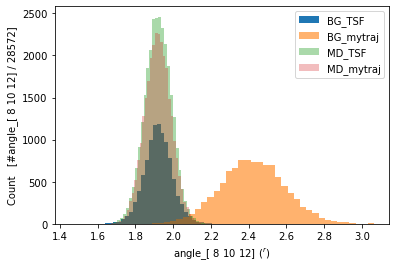

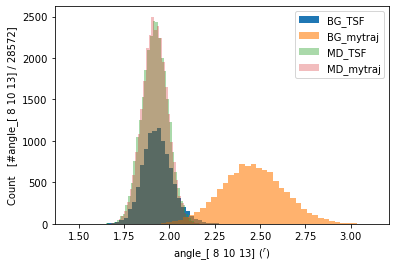

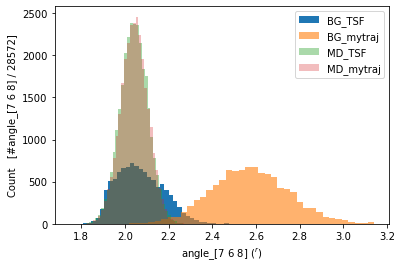

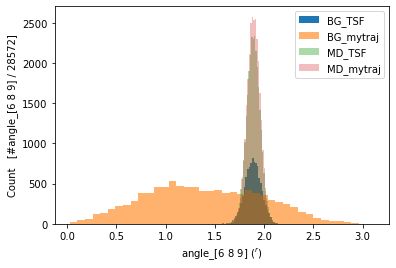

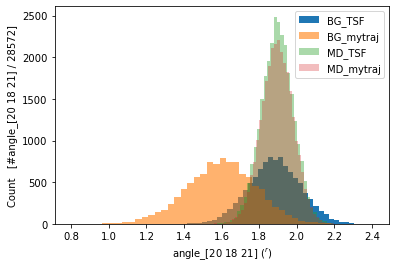

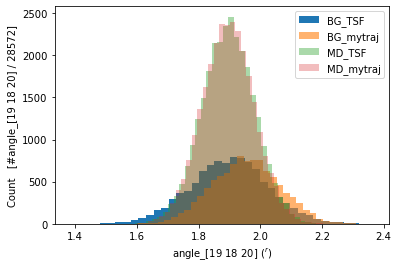

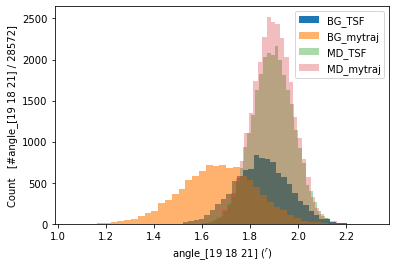

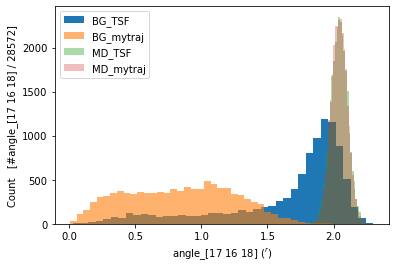

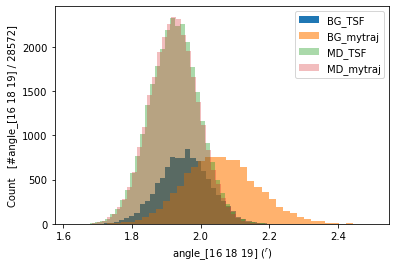

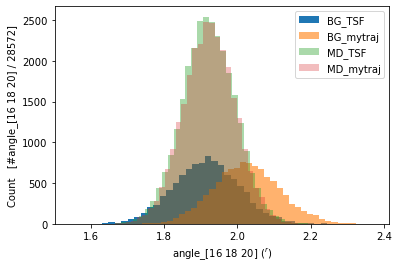

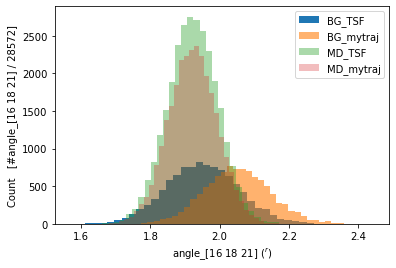

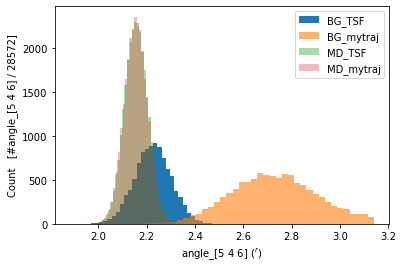

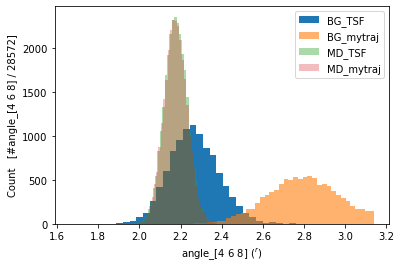

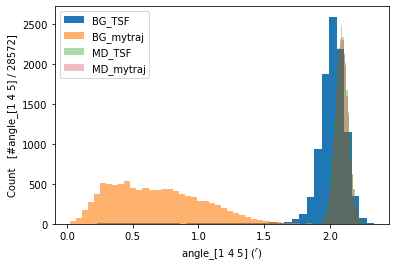

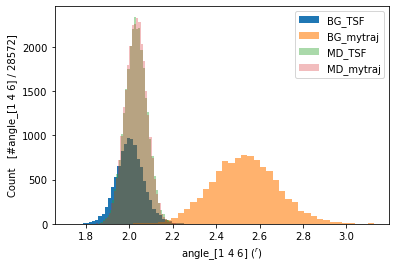

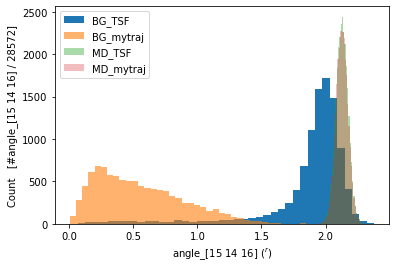

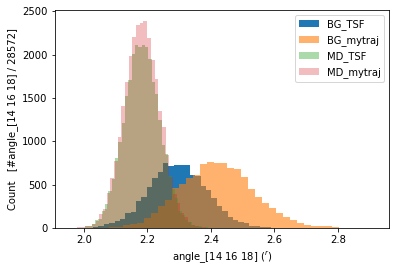

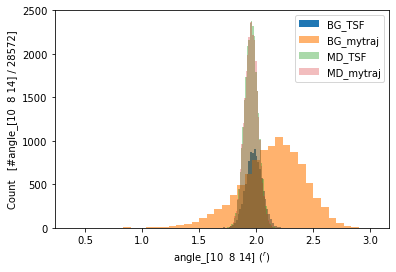

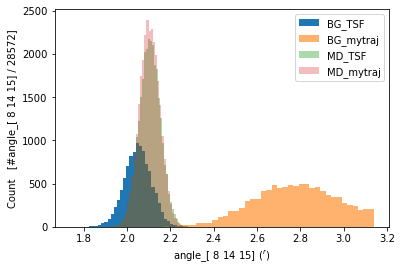

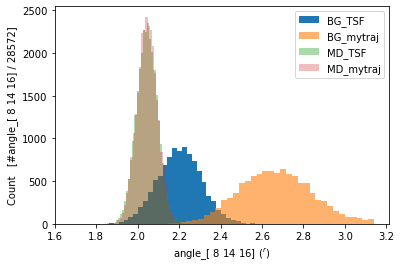

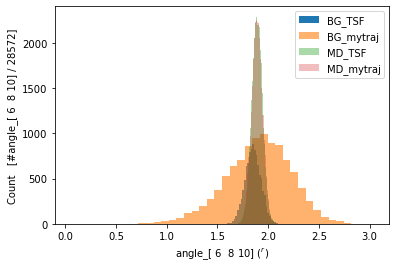

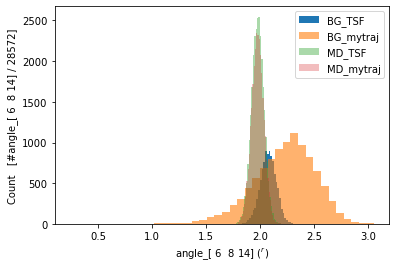

In [17]:
#print(anglesBG.shape[1])
for angle in range(anglesBG.shape[1]):
    dofname = angles['full_corrected'][angle]
    print(dofname)
    plot_dof_comparison(anglesBG[:,angle],
    anglesBG2[:,angle],
    anglesMD[:,angle], 
    anglesMD2[:,angle],
    dofname=f'angle_{dofname}')